Universidad Galileo

Ciencia de Datos en Python

PAPD - Sección V

Sergio José Barrios Martínez

Carnet No. 19012765

# Proyecto No. 1


## Preparación de Datos.

Se utilizará el módulo numpy para poder hacer uso de sus arreglos y las funciones de carga

In [119]:
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt

Se encuentra el tamaño de los datos por medio de la función SIZE, refiriendo la dimensión adecuada:

In [2]:
X = np.load('proyecto_training_data.npy');
X_num_filas = np.size(X,0);
X_num_columnas = np.size(X,1);

print("El conjunto de datos está formado por",X_num_columnas,"columnas y", X_num_filas,"filas.");

El conjunto de datos está formado por 6 columnas y 1460 filas.


Se encuentra la dimensión de los datos de "Entrenamiento" (train) y "Prueba" (test)

In [3]:
train_num_filas = int(X_num_filas * 0.8);
train_num_columnas = X_num_columnas;

test_num_filas = int(X_num_filas * 0.2);
test_num_columnas = X_num_columnas;


print("Los datos de entrenamiento tendrán",train_num_filas,"filas.");
print("Los datos de prueba tendrán",test_num_filas,"filas.");

Los datos de entrenamiento tendrán 1168 filas.
Los datos de prueba tendrán 292 filas.


Se realiza un "slicing" para separar los conjuntos de datos de entrenamiento y pruebas.

In [4]:
x_train = X[:train_num_filas,:]
x_test = X[train_num_filas:,:]

print(np.size(x_train,0))
print(np.size(x_test,0))

1168
292


## Exploración Previa Datos.

Se utilizará estadística descriptiva para explorar las variables independientes "x" del modelo.
Se inicia con el cálculo de las medias para cada "x". En este caso específico, de acuerdo a los datos proporcionados, las columnas son:
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* OverallQual: Overall material and finish quality, rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
* 1stFlrSF: First Floor square feet
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* YearBuilt: Original construction date
* LotFrontage: Linear feet of street connected to property

De acá conocemos que la primera columna es la variable dependiente "y" que queremos predecir: **"Precio de Venta"**.
Separaremos las "x's" de la "y" a predecir, nombrando los arreglos:


In [5]:
SalePrice = x_train[:,[0]];
OverallQual = x_train[:,[1]];
FstFlrSF = x_train[:,[2]];
TotRmsAbvGrd = x_train[:,[3]];
YearBuilt = x_train[:,[4]];
LotFrontage = x_train[:,[5]];

# Medias

Se calcula la media de cada columna, utilizando la función "mean" del arreglo numpy, específicando que lo haga sobre el axis 0 (columnas):


In [6]:
SalePrice_media = np.around(np.mean(SalePrice),2);
OverallQual_media = np.around(np.mean(OverallQual),2);
FstFlrSF_media = np.around(np.mean(FstFlrSF),2);
TotRmsAbvGrd_media = np.around(np.mean(TotRmsAbvGrd),2);
YearBuilt_media = np.around(np.mean(YearBuilt),2);
LotFrontage_media = np.around(np.mean(LotFrontage),2);

print("Medias:");
print("SalePrice:",SalePrice_media);
print("OverallQual:",OverallQual_media);
print("1stFlrSF:",FstFlrSF_media);
print("TotRmsAbvGrd:",TotRmsAbvGrd_media);
print("YearBuilt:",YearBuilt_media);
print("LotFrontage:",LotFrontage_media);

Medias:
SalePrice: 180590.28
OverallQual: 6.1
1stFlrSF: 1156.32
TotRmsAbvGrd: 6.49
YearBuilt: 1971.45
LotFrontage: nan


Vemos que la "x" *LotFrontage* (que se refiere a los pies lineales de calle conectada a la propiedad) tiene valores faltantes, ya que el cálculo devuelve el valor NaN de numpy: (NaN: Not a Number). Para verificar esto, necesitamos explorar la variable y verificar los valores que tiene esta "x". Específicamente, buscamos cuántos datos NaN tenemos, para evaluar la estrategia a utilizar con esta "x":

In [7]:
np.count_nonzero(np.isnan(LotFrontage))

206

La "x" LotFrontage tiene 206 valores NaN. Para poder encontrar la media, sin tomar en cuenta estos valores, usaremos la función **nanmean** sobre esta "x", de forma que:

In [8]:
LotFrontage_media = np.around(np.nanmean(LotFrontage),2);
print("Media LotFrontage (sin NaNs):",LotFrontage_media)

Media LotFrontage (sin NaNs): 69.95


# Máximos

Máximos de cada variable (sin considerar NaNs en LotFrontage):

In [9]:
SalePrice_max = np.amax(SalePrice);
OverallQual_max = np.amax(OverallQual);
FstFlrSF_max = np.amax(FstFlrSF);
TotRmsAbvGrd_max = np.amax(TotRmsAbvGrd);
YearBuilt_max = np.amax(YearBuilt);
LotFrontage_max = np.nanmax(LotFrontage);

print("Máximos:");
print("SalePrice:",SalePrice_max);
print("OverallQual:",OverallQual_max);
print("1stFlrSF:",FstFlrSF_max);
print("TotRmsAbvGrd:",TotRmsAbvGrd_max);
print("YearBuilt:",YearBuilt_max);
print("LotFrontage:",LotFrontage_max);

Máximos:
SalePrice: 755000.0
OverallQual: 10.0
1stFlrSF: 3228.0
TotRmsAbvGrd: 14.0
YearBuilt: 2010.0
LotFrontage: 313.0


# Mínimos

Mínimos de cada variable (sin considerar NaNs en LotFrontage):

In [10]:
SalePrice_min = np.amin(SalePrice);
OverallQual_min = np.amin(OverallQual);
FstFlrSF_min = np.amin(FstFlrSF);
TotRmsAbvGrd_min = np.amin(TotRmsAbvGrd);
YearBuilt_min = np.amin(YearBuilt);
LotFrontage_min = np.nanmin(LotFrontage);

print("Mínimos:");
print("SalePrice:",SalePrice_min);
print("OverallQual:",OverallQual_min);
print("1stFlrSF:",FstFlrSF_min);
print("TotRmsAbvGrd:",TotRmsAbvGrd_min);
print("YearBuilt:",YearBuilt_min);
print("LotFrontage:",LotFrontage_min);

Mínimos:
SalePrice: 34900.0
OverallQual: 1.0
1stFlrSF: 334.0
TotRmsAbvGrd: 2.0
YearBuilt: 1875.0
LotFrontage: 21.0


# Rango (Peak to Peak)

Rangos de cada variable (la función **ptp** toma en cuenta NaNs en LotFrontage, por lo que se usa **max** - **min**):

In [11]:
SalePrice_ran = np.ptp(SalePrice);
OverallQual_ran = np.ptp(OverallQual);
FstFlrSF_ran = np.ptp(FstFlrSF);
TotRmsAbvGrd_ran = np.ptp(TotRmsAbvGrd);
YearBuilt_ran = np.ptp(YearBuilt);
LotFrontage_ran =LotFrontage_max - LotFrontage_min;

print("Rangos (Peak to Peak):");
print("SalePrice:",SalePrice_ran);
print("OverallQual:",OverallQual_ran);
print("1stFlrSF:",FstFlrSF_ran);
print("TotRmsAbvGrd:",TotRmsAbvGrd_ran);
print("YearBuilt:",YearBuilt_ran);
print("LotFrontage:",LotFrontage_ran);

Rangos (Peak to Peak):
SalePrice: 720100.0
OverallQual: 9.0
1stFlrSF: 2894.0
TotRmsAbvGrd: 12.0
YearBuilt: 135.0
LotFrontage: 292.0


# Desviación Estándar

Desviación Estándar de cada variable (ignorando NaNs en LotFrontage):

In [12]:
SalePrice_std = np.around(np.std(SalePrice),2);
OverallQual_std = np.around(np.std(OverallQual),2);
FstFlrSF_std = np.around(np.std(FstFlrSF),2);
TotRmsAbvGrd_std = np.around(np.std(TotRmsAbvGrd),2);
YearBuilt_std = np.around(np.std(YearBuilt),2);
LotFrontage_std = np.around(np.nanstd(LotFrontage),2);

print("Desviación Estándar:");
print("SalePrice:",SalePrice_std);
print("OverallQual:",OverallQual_std);
print("1stFlrSF:",FstFlrSF_std);
print("TotRmsAbvGrd:",TotRmsAbvGrd_std);
print("YearBuilt:",YearBuilt_std);
print("LotFrontage:",LotFrontage_std);

Desviación Estándar:
SalePrice: 78781.95
OverallQual: 1.38
1stFlrSF: 373.62
TotRmsAbvGrd: 1.61
YearBuilt: 29.94
LotFrontage: 23.47


# Histogramas

Histogramas de cada variable (usando la función *distplot* de **seaborn**).

#### SalePrice

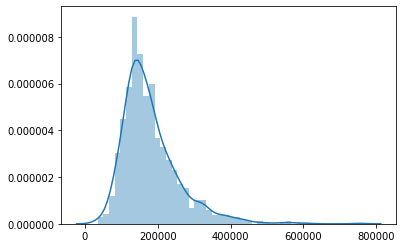

In [13]:
sns.distplot(SalePrice);

#### OverallQual

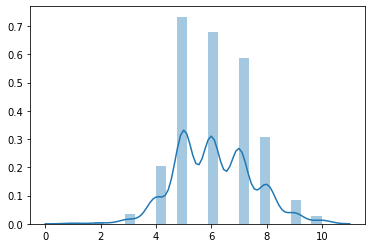

In [14]:
sns.distplot(OverallQual);

#### 1stFlrSF

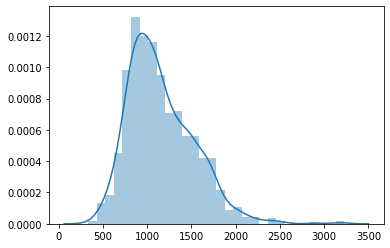

In [15]:
sns.distplot(FstFlrSF);


#### TotRmsAbvGrd

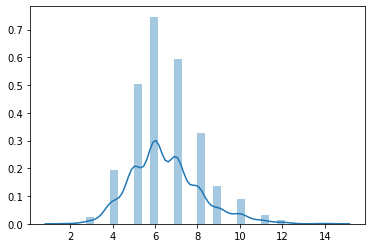

In [16]:
sns.distplot(TotRmsAbvGrd);

#### YearBuilt

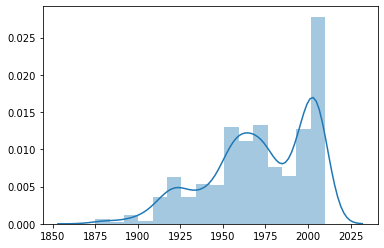

In [17]:
sns.distplot(YearBuilt);

#### LotFrontage

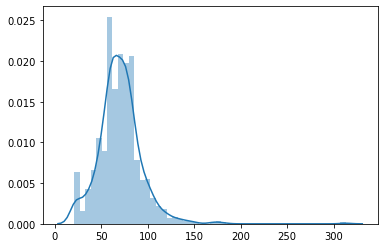

In [18]:
sns.distplot(LotFrontage);

# Correlaciones y ScatterPlots

A continuación se muestran las correlaciones individuales de cada **x** con la **y** de interés.

In [120]:
plt.style.use('bmh')

#### SalePrice vrs. OverallQual

In [20]:
SalePriceVrsOverallQual_Corr = np.corrcoef(OverallQual.transpose(),SalePrice.transpose());
print (SalePriceVrsOverallQual_Corr[0][1]);

0.7939900504626405


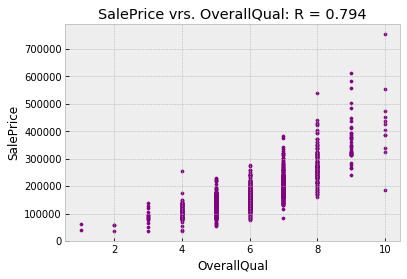

In [21]:
plt.scatter(OverallQual.transpose(), SalePrice.transpose(),c='purple',s=10)
plt.title('SalePrice vrs. OverallQual: R = '+str(np.around(SalePriceVrsOverallQual_Corr[0][1],3)))
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

#### SalePrice vrs. 1stFlrSF

In [22]:
SalePriceVrsFstFlrSF_Corr = np.corrcoef(FstFlrSF.transpose(),SalePrice.transpose());
print (SalePriceVrsFstFlrSF_Corr[0][1]);

0.6162887000998717


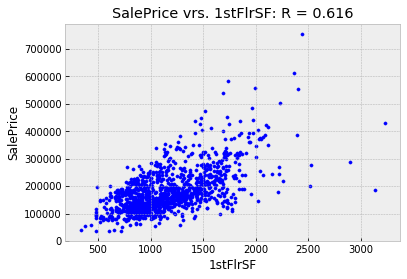

In [23]:
plt.scatter(FstFlrSF.transpose(), SalePrice.transpose(),c='blue',s=10)
plt.title('SalePrice vrs. 1stFlrSF: R = '+str(np.around(SalePriceVrsFstFlrSF_Corr[0][1],3)))
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.show()

#### SalePrice vrs. TotRmsAbvGrd

In [24]:
SalePriceVrsTotRmsAbvGrd_Corr = np.corrcoef(TotRmsAbvGrd.transpose(),SalePrice.transpose());
print (SalePriceVrsTotRmsAbvGrd_Corr[0][1]);

0.5647069399593065


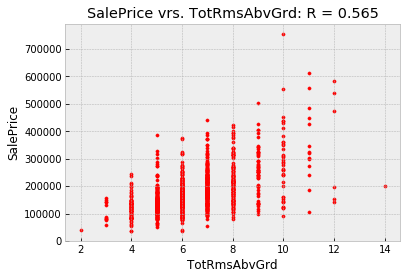

In [25]:
plt.scatter(TotRmsAbvGrd.transpose(), SalePrice.transpose(),c='red',s=10)
plt.title('SalePrice vrs. TotRmsAbvGrd: R = '+str(np.around(SalePriceVrsTotRmsAbvGrd_Corr[0][1],3)))
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.show()

#### SalePrice vrs. YearBuilt

In [26]:
SalePriceVrsYearBuilt_Corr = np.corrcoef(YearBuilt.transpose(),SalePrice.transpose());
print (SalePriceVrsYearBuilt_Corr[0][1]);

0.5341706927117515


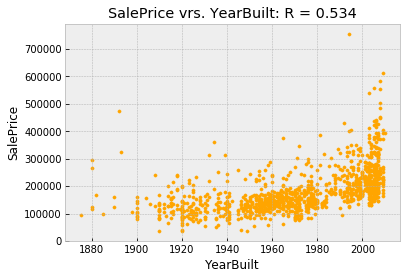

In [27]:
plt.scatter(YearBuilt.transpose(), SalePrice.transpose(),c='orange',s=10)
plt.title('SalePrice vrs. YearBuilt: R = '+str(np.around(SalePriceVrsYearBuilt_Corr[0][1],3)))
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

#### SalePrice vrs. LotFrontage

In [28]:
SalePriceVrsLotFrontage_Corr = np.corrcoef(LotFrontage.transpose(),SalePrice.transpose());
print (SalePriceVrsLotFrontage_Corr[0][1]);

nan


Nótese que el arreglo **LotFrontage** posee valores NaN, por lo que el coeficiente de correlación devuelve este resultado. Es necesario tener un criterio para operar estos valores NaN. Si se revisa la definición, *LotFrontage* se refiere a los pies lineales de calle connectados a la propiedad. Sin más información al respecto, lo que haremos en este punto es eliminar estos valores de los arreglos *LotFrontage* y su correspondiente par en *SalePrice*. De este modo no estaremos introduciendo una *correlación artificial*, como se haría si asumieramos un valor de reemplazo para los NaNs.

El procedimiento que se seguirá es identificar los valores NaN en *LotFrontage* por medio de un arreglo, con  la función **isnan** que servirá como *máscara* (arreglo booleano). El complemento de este arreglo identificará todas las posiciones que contienen valores que no son NaN en LotFrontage, y así para poderlas filtrar por medio de una llamada indexada, tanto en **LotFrontage** como en **SalePrice**. Estos arreglos para esta correlación se identificarán como LotFrontage2 y SalePrice2:

In [29]:
nan_LotFrontage = np.isnan(LotFrontage.transpose())
not_nan_LotFrontage = ~ nan_LotFrontage
LotFrontage2 = LotFrontage.transpose()[not_nan_LotFrontage]
SalePrice2 = SalePrice.transpose()[not_nan_LotFrontage]

In [30]:
SalePriceVrsLotFrontage_Corr = np.corrcoef(LotFrontage2,SalePrice2);
print (SalePriceVrsLotFrontage_Corr[0][1]);

0.363291616653892


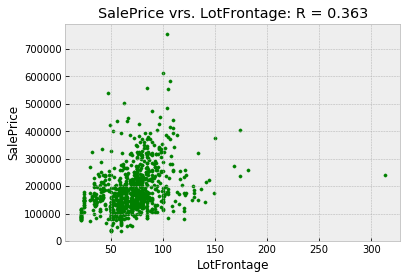

In [31]:
plt.scatter(LotFrontage2, SalePrice2,c='green',s=10)
plt.title('SalePrice vrs. LotFrontage: R = '+str(np.around(SalePriceVrsLotFrontage_Corr[0][1],3)))
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.show()

# Modelos de Correlación

Basados en este análisis, existen dos **"x"** con mayor potencial.
* OverallQual: R = 0.794
* 1stFlrSF: R = 0.616

Se trabajarán los modelos con estas variables independientes, con la definición de una función de **ENTRENAMIENTO**.

Inicialmente, se define la función que grafica el comportamiento del error entre el modelo de predicción y los valores reales:


In [103]:
def grafico_error(epoch,errores):
    plt.scatter(np.array(range(epoch)), errores,c='green',s=10)
    plt.title('Errores')
    plt.xlabel('epoch')
    plt.ylabel('error')
    plt.show()

Se define la función de **ENTRENAMIENTO**:
* Parámetros de Entrada: Vector "X", Vector "Y", Número de Iteraciones (EPOCH), número para despliegue de errores, Learning Rate.
* Parámetros de Salida: Diccionario con Historial de Parámetros (m,b), Vector de Errores.



In [130]:
def entrenamiento(x,y,epoch,imprimir_error_cada,lr):
    
    parametros = np.array([[45000.0],[-85000.0]]) # vector (m,b) con valores iniciales
    vector_error=[0]*epoch # vector de errores
    diccionario_modelo = {}
    m = b = 0.0
    
    unos = np.ones((np.size(x), 1))
    matriz_x = np.concatenate((x,unos),axis=1)
    
    
    for i in range(epoch):
        y_hat = np.dot(matriz_x,parametros)  # Producto punto para actualizar el valor de predicción y_hat = mX + b
        error = 0.5 * np.average((y - y_hat)**2) # cálculo del error
        vector_error[i] = error # almacenamiento del error en un vector
        
        vector_gradiente = np.average(matriz_x*(y_hat - y),axis=0)     # vector_gradiente (gradiente_m, gradiente_b)
        
        # Cálculo de parámetros del modelo
        m = parametros[0] - lr * vector_gradiente[0]       # actualizando m
        b = parametros[1] - lr * vector_gradiente[1]       # actualizando b
        
        # Almacenamiento de historia de parámetros (m,b)
        diccionario_modelo[i] = [np.around(m[0],2),np.around(b[0],2)]
        
        # Actualización de parámetros del modelo para la siguiente iteración
        parametros[0] = m
        parametros[1] = b
    
    
        # Visualización de progresión de errores y sus respectivos parámetros m y b
        if (i+1) % imprimir_error_cada == 0:
            print("EPOCH ",i+1,": Error =",np.around(error,2)," [m,b]=",diccionario_modelo[i])
    
    
    # Función para Gráfica de pérdidas
    grafico_error(epoch,vector_error)
    
    print("Estimación Final de parámetros:")
    print("m: ",np.around(parametros[0][0],2))
    print("b: ",np.around(parametros[1][0],2))
    print("pérdida mínima :",np.around(error,2))

    return diccionario_modelo,vector_error

Llamada a la función de **ENTRENAMIENTO**:

EPOCH  100 : Error = 1157544356.35  [m,b]= [44257.58, -85126.84]
EPOCH  200 : Error = 1151491052.27  [m,b]= [43926.46, -85189.45]
EPOCH  300 : Error = 1150275661.31  [m,b]= [43779.29, -85223.33]
EPOCH  400 : Error = 1150027938.7  [m,b]= [43714.39, -85244.35]
EPOCH  500 : Error = 1149973773.91  [m,b]= [43686.28, -85259.61]
EPOCH  600 : Error = 1149958332.5  [m,b]= [43674.62, -85272.3]
EPOCH  700 : Error = 1149950645.09  [m,b]= [43670.32, -85283.83]
EPOCH  800 : Error = 1149944517.31  [m,b]= [43669.31, -85294.83]
EPOCH  900 : Error = 1149938710.17  [m,b]= [43669.77, -85305.59]
EPOCH  1000 : Error = 1149932975.83  [m,b]= [43670.89, -85316.24]


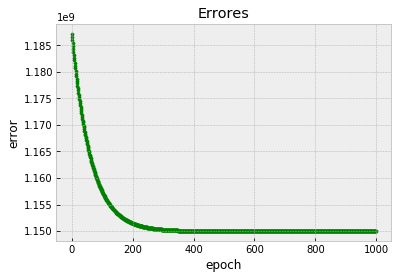

Estimación Final de parámetros:
m:  43670.89
b:  -85316.24
pérdida mínima : 1149932975.83


In [131]:
diccionario = {}
error_iteracion = []

diccionario,error_iteracion = entrenamiento(OverallQual,SalePrice,1000,100,0.0002)

## Evolución del Modelo
Se crea una función para observar la evolución del modelo en el tiempo:

In [ ]:
def evolucion(diccionario,n):
    plt.scatter(np.array(range(epoch)), errores,c='green',s=10)
    plt.title('Errores')
    plt.xlabel('epoch')
    plt.ylabel('error')
    plt.show()
    return

In [133]:
print(len(diccionario))

1000
